<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Análisis exploratorio</a></span><ul class="toc-item"><li><span><a href="#Variable-respuesta" data-toc-modified-id="Variable-respuesta-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Variable respuesta</a></span></li><li><span><a href="#Variables-predictoras" data-toc-modified-id="Variables-predictoras-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variables predictoras</a></span><ul class="toc-item"><li><span><a href="#Variables-numéricas" data-toc-modified-id="Variables-numéricas-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Variables numéricas</a></span></li><li><span><a href="#Correlación-entre-variables-numéricas" data-toc-modified-id="Correlación-entre-variables-numéricas-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Correlación entre variables numéricas</a></span></li><li><span><a href="#Variables-categóricas" data-toc-modified-id="Variables-categóricas-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Variables categóricas</a></span></li></ul></li></ul></li><li><span><a href="#Preprocesado" data-toc-modified-id="Preprocesado-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocesado</a></span></li></ul></div>

In [7]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [8]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Cargamos los datos sin el preprocesado. Eso si, está limpia la columna de `gender`, `state` que estaba un poco sucia. 

In [25]:
df = pd.read_csv("data/california.csv", index_col = 0)

df.head()

,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,avggift
0,FL,M,1158.437751,392.0,430.0,466.0,520.0,NaN
1,IL,NaN,537.000000,365.0,415.0,410.0,473.0,5.666667
2,FL,F,725.000000,301.0,340.0,361.0,436.0,4.111111
3,NC,M,1158.437751,NaN,407.0,NaN,413.0,27.277778
4,FL,F,995.000000,NaN,280.0,316.0,348.0,6.000000


In [26]:
nuevas_columnas = {"ic2" : "total_baños", 
                    "ic3": "num_vecinos", 
                    "ic4": "num_habitaciones", 
                    "avggift": "dist_playa"}


df.rename(columns = nuevas_columnas, inplace = True)

In [27]:
df.head()

,state,gender,median_home_val,median_household_income,total_baños,num_vecinos,num_habitaciones,dist_playa
0,FL,M,1158.437751,392.0,430.0,466.0,520.0,NaN
1,IL,NaN,537.000000,365.0,415.0,410.0,473.0,5.666667
2,FL,F,725.000000,301.0,340.0,361.0,436.0,4.111111
3,NC,M,1158.437751,NaN,407.0,NaN,413.0,27.277778
4,FL,F,995.000000,NaN,280.0,316.0,348.0,6.000000


In [28]:
df.to_csv("data/california_renombrado.csv")

# Análisis exploratorio

Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:

Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.

Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

Además, este análisis inicial puede dar pistas sobre qué variables son adecuadas como predictores en un modelo (más sobre esto en los siguientes apartados).

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    3333 non-null   object 
 1   gender                   3260 non-null   object 
 2   median_home_val          3333 non-null   float64
 3   median_household_income  3235 non-null   float64
 4   total_baños              3325 non-null   float64
 5   num_vecinos              3261 non-null   float64
 6   num_habitaciones         3300 non-null   float64
 7   dist_playa               3096 non-null   float64
dtypes: float64(6), object(2)
memory usage: 234.4+ KB


In [7]:
# Número de datos nulos por columna
# ==============================================================================
df.isnull().sum()

state                        0
gender                      73
median_home_val              0
median_household_income     98
num_habitaciones             8
num_vecinos                 72
total_habitaciones          33
total_baños                333
dist_playa                 237
dtype: int64

## Variable respuesta

Cuando se crea un modelo, es muy importante estudiar la distribución de la variable respuesta, ya que, a fin de cuentas, es lo que interesa predecir. La variable precio tiene una distribución asimétrica con una cola positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media. 

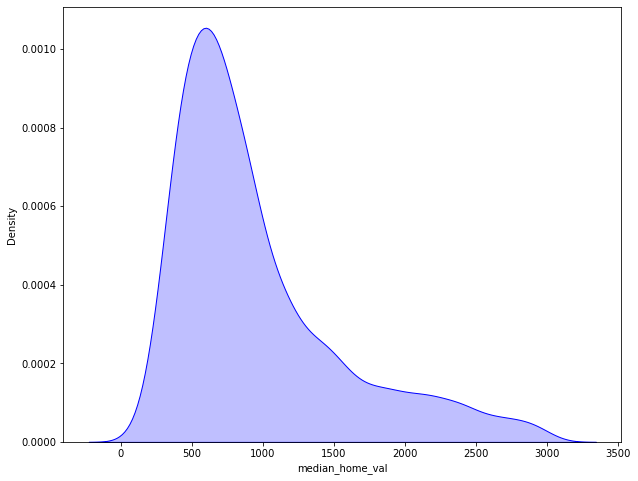

In [12]:
# vamos a ver visualmente como está distribuida la variable respuesta

sns.distplot(
    df.median_home_val, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});



## Variables predictoras

Al igual que con la variable respuesta debemos conocer como son nuestras variables predictoras, como se relacionan entre ellas y como lo hacen con la variable respuesta.

Vamos a ello: 

### Variables numéricas


In [14]:
# exploramos cuáles son los principales estadísticos de las variables numéricas

df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
median_home_val,3333.0,958.737493,595.336323,128.00000,544.00000,770.0,1182.000000,2989.0
median_household_income,3235.0,333.426893,131.912479,53.00000,236.00000,312.0,409.000000,1273.0
num_habitaciones,3325.0,380.259549,136.813967,0.00000,282.00000,360.0,459.000000,1332.0
num_vecinos,3261.0,383.030665,133.516095,89.00000,286.00000,357.0,457.000000,1057.0
total_habitaciones,3300.0,425.906667,141.223738,0.00000,323.00000,402.0,503.000000,1118.0
total_baños,3000.0,15300.101000,6240.616037,3748.00000,11108.75000,14056.0,17913.000000,64360.0
dist_playa,3096.0,11.627554,10.623563,2.26087,7.07085,10.0,14.096429,450.0


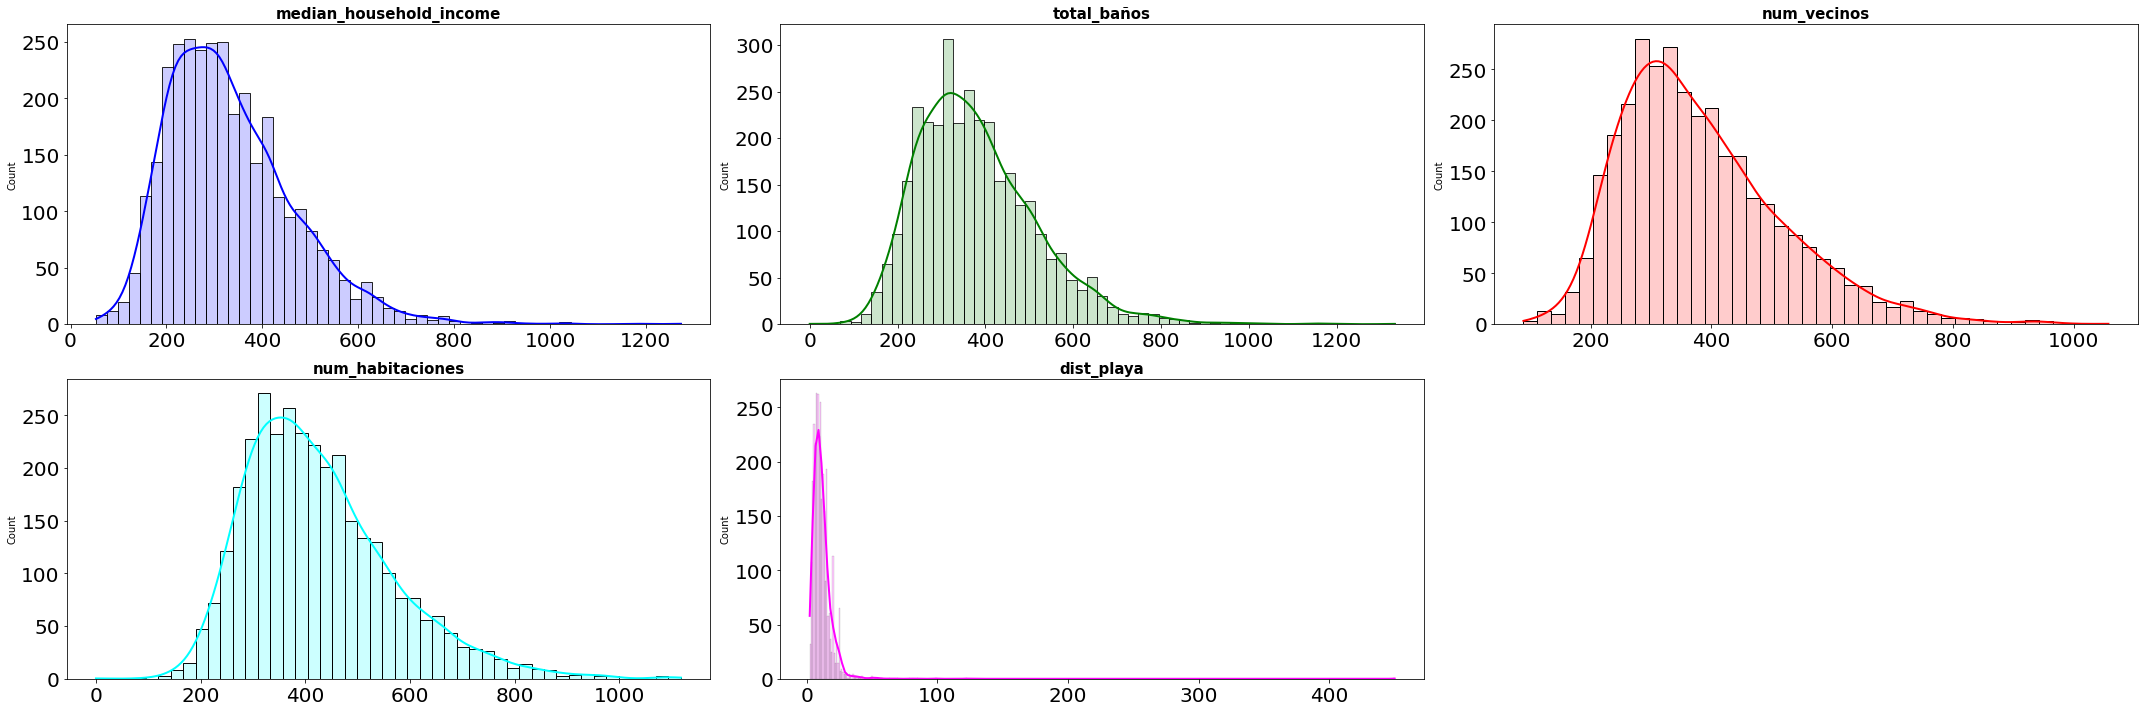

In [24]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("median_home_val")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout()
fig.delaxes(axes[-1]) # Eliminamos el último eje que no se usa;
    





Como el objetivo del estudio es predecir el precio de las viviendas, el análisis de cada variable se hace también en relación a la variable respuesta precio. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.

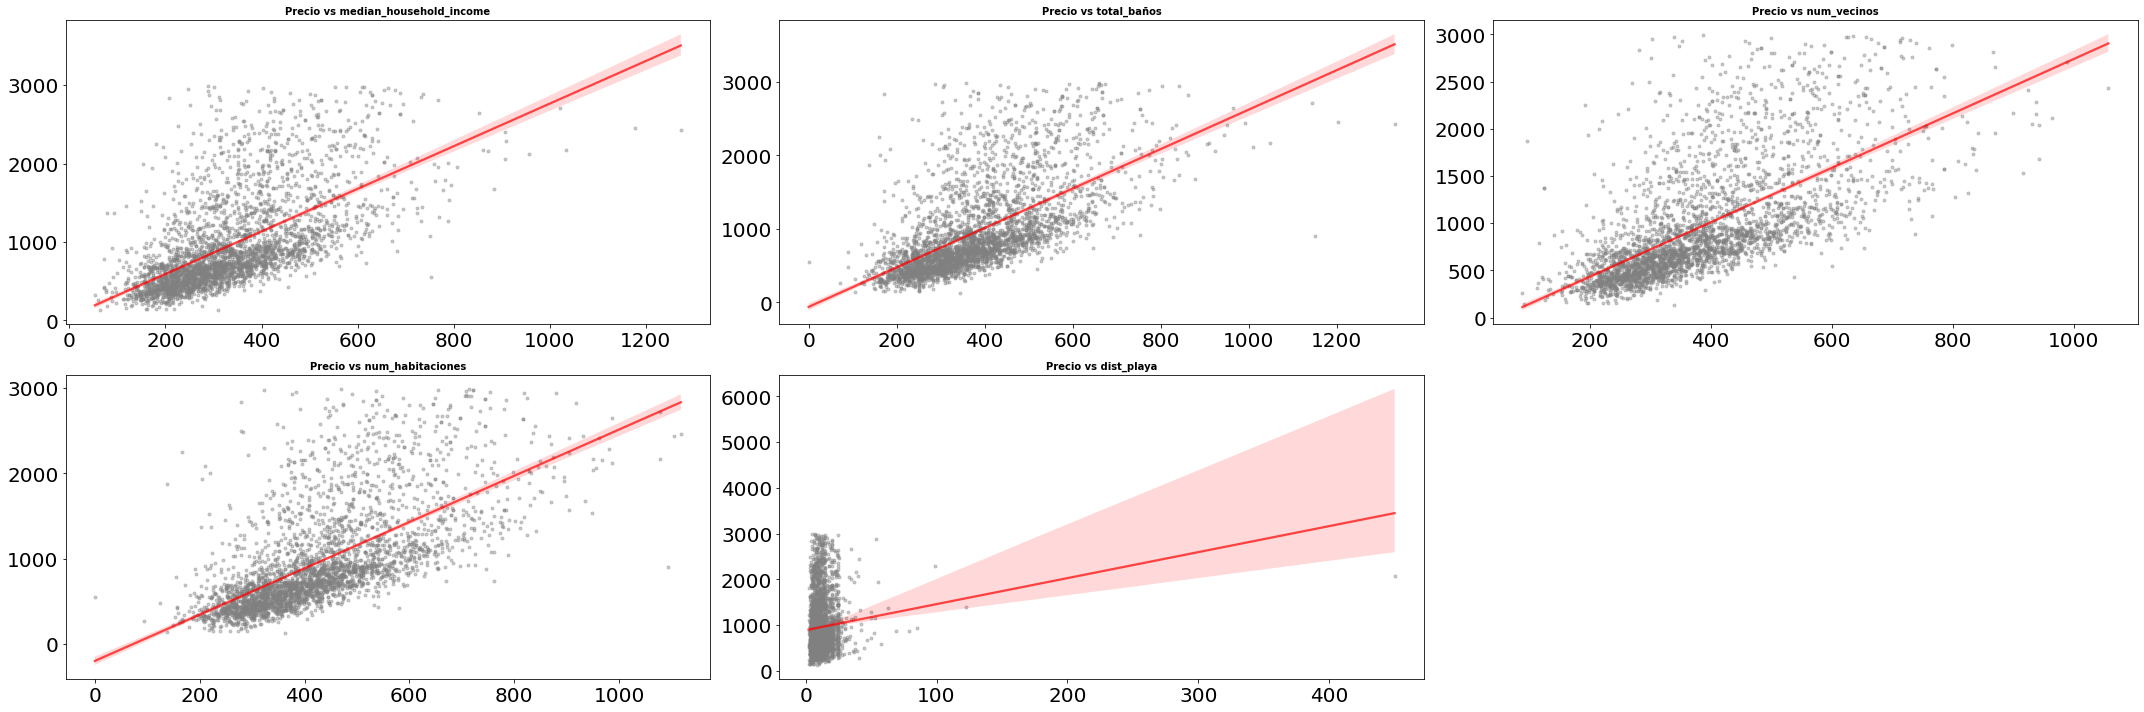

In [26]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("median_home_val")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["median_home_val"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1]) 

### Correlación entre variables numéricas

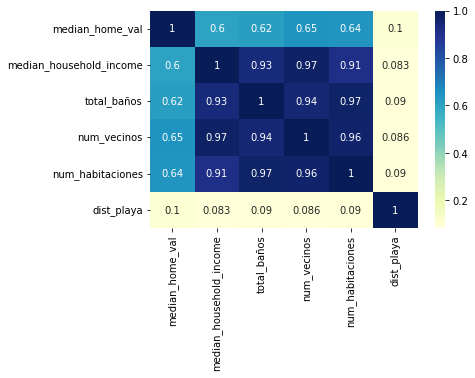

In [28]:
sns.heatmap(df.corr(numeric_only = True), 
           cmap = "YlGnBu", 
           annot = True);



In [30]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype = np.bool_))
mask


array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

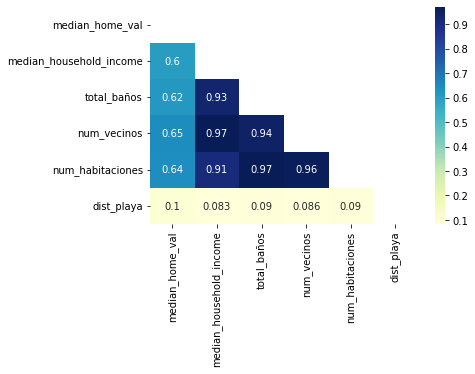

In [31]:
sns.heatmap(df.corr(numeric_only = True), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

EJEMPLO DE APRENDIZAJE CON BOLIS COMO VARIABLES REDUNDATES. Da igual con que boli aprendas 

El coeficiente de correlación de Pearson oscila entre –1 y +1:

- Un valor menor que 0 indica que existe una correlación negativa, es decir, que las dos variables están asociadas en sentido inverso. Cuánto más se acerca a -1, mayor es la fuerza de esa relación invertida (cuando el valor en una sea muy alto, el valor en la otra será muy bajo). Cuando es exactamente -1, eso significa que tienen una correlación negativa perfecta.


- Un valor mayor que 0 indica que existe una correlación positiva. En este caso las variables estarían asociadas en sentido directo. Cuanto más cerca de +1, más alta es su asociación. Un valor exacto de +1 indicaría una relación lineal positiva perfecta.


- Finalmente, una correlación de 0, o próxima a 0, indica que no hay relación lineal entre las dos variables.

Existe bastante consenso a la hora de interpretar los valores del coeficiente de correlación de Pearson utilizando los siguientes criterios (y considerando los valores absolutos):

- Entre 0 y 0.10: correlación inexistente


- Entre 0.10 y 0.29: correlación débil


- Entre 0.30 y 0.60: correlación moderada


- Entre 0.60 y 1: correlación fuerte


**Otros tipos de correlación** 

![image%20%286%29.png](/Users/jeancharlesyamada/ironhack/b2c/mayo23/apuntes_clases/images/tipos_correlacion.png)

### Variables categóricas

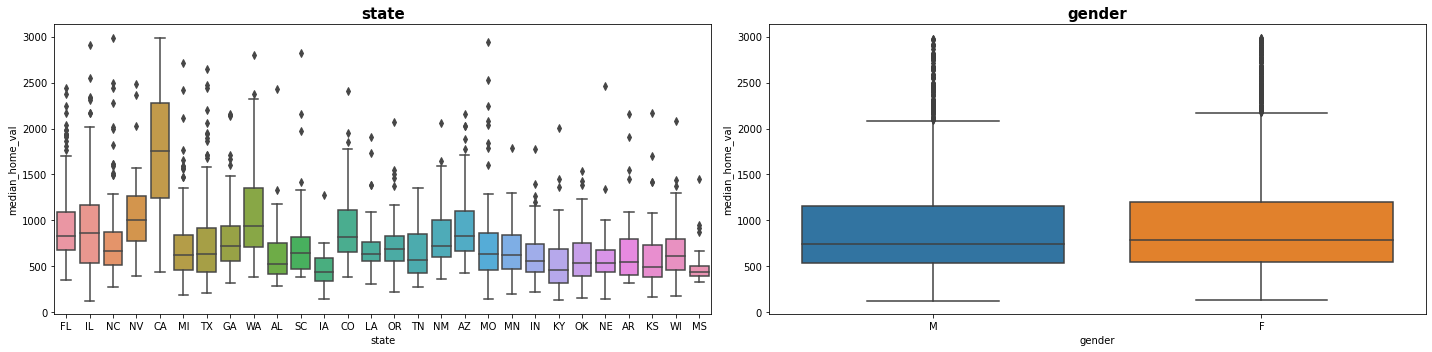

In [36]:
# Gráfico para cada variable cualitativa
# ==============================================================================

fig, axes = plt.subplots(1, 2, figsize = (20,5))


columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    sns.boxplot(x=colum, y="median_home_val", data=df,ax=axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    
fig.tight_layout();


- Parece que el genero no afecta al valor de la vivienda. 
- Pero si parece existir una relacion con el estado. 

# Preprocesado

Aquí incluimos: 

- Gestión de **outliers**


- Gestión de **nulos**


- **Codificación** variables categóricas


- **Normalización** y **Estandarización**